# Project Data Analytics: Brazilian E-Commerce Public Dataset

- Name: Stefanus Bernard Melkisedek
- Email: stefanussipahutar@gmail.com
- Id Dicoding: stefansphtr


## Define Business Questions

| **NO** | **BUSINESS QUESTION**                                                                                                                  |
| :----: | -------------------------------------------------------------------------------------------------------------------------------------- |
|   1.   | Which product category has the most outstanding performance in terms of rating reviews from 2017 to 2018?                              |
|   2.   | What is our current on-time delivery rate, and how can we improve it to meet customer expectations and increase customer satisfaction? |
|   3.   | What is the demographic profile of our customer base?                                                                                  |
|   4.   | During the final quarter of 2018, what was the purchasing frequency of the customers?                                                  |
|   5.   | What was the amount of money customers spent during the last three months of 2018?                                                     |


## Prepare all the library needed


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from module.plotMissingValue import percentage as pmv

## Data Wrangling


### Gathering Data


The data is downloaded from Kaggle, the link is [here](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv). The data is in csv format, so we can use pandas to read the data.


1. Read the customer data and save it to variable `customers_df`


In [127]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


2. Read the geolocation data and save it to variable `geolocation_df`


In [128]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


3. Read the order items data and save it to variable `order_items_df`


In [129]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


4. Read the order payments data and save it to variable `order_payments_df`


In [130]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


5. Read the order reviews data and save it to variable `order_reviews_df`


In [131]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


6. Read the orders data and save it to variable `orders_df`


In [132]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


7. Read the products data and save it to variable `products_df`


In [133]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


8. Read the product category name data and save it to variable `product_category_name_df`


In [134]:
product_category_name_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


9. Read the sellers data and save it to variable `sellers_df`


In [135]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data


#### Assess the customers table


In [136]:
# Check the summary of the dataset and its columns
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [137]:
# Check the missing value in the table customers_df
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [138]:
# Check the duplicate value in the table customers_df
duplicate_value = customers_df.duplicated()

print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [139]:
# Check statistics of the table customers_df
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assess the orders table


In [140]:
# Check the summary of the dataset and its columns
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [141]:
# Check the missing value in the table orders_df
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [142]:
# Check the duplicate value in the table orders_df
duplicate_value = orders_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Assess the order_items table


In [143]:
# Check the summary of the dataset and its columns
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [144]:
# Check the missing value in the table order_items_df
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [145]:
# Check the duplicate value in the table order_items_df
duplicate_value = order_items_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [146]:
# Check the duplicate value in order lines
order_lines_duplicate = order_items_df[["order_id", "product_id"]].duplicated().sum()
print(f"Total duplicate value in order lines: {order_lines_duplicate}")

Total duplicate value in order lines: 10225


Note!
The structure of order items table is not using order quantities, but repeating order lines for each product. So, we need to calculate the total quantity of each product ordered.


In [147]:
# Check the statistics of the table order_items_df
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [148]:
print(order_items_df.loc[order_items_df["freight_value"].idxmax()])

order_id               a77e1550db865202c56b19ddc6dc4d53
order_item_id                                         1
product_id             ec31d2a17b299511e7c8627be9337b9b
seller_id              257e61d3251fb5efb9daadddbc2cf7ca
shipping_limit_date                 2018-04-25 06:55:13
price                                             979.0
freight_value                                    409.68
Name: 73486, dtype: object


<Axes: xlabel='price'>

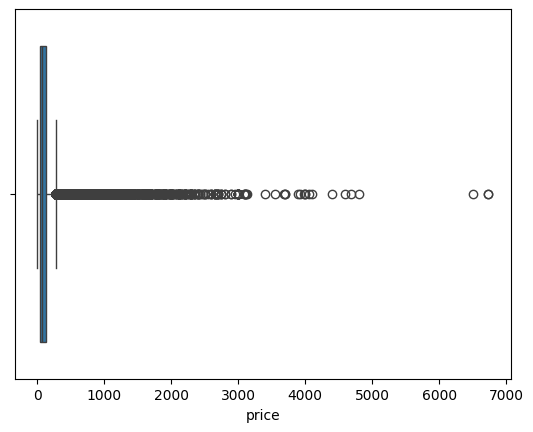

In [149]:
# Plot the boxplot of the feature price
sns.boxplot(x=order_items_df["price"])

#### Assess the order_payments table


In [150]:
# Check the summary of the dataset and its columns
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [151]:
# Check  the missing value in the table order_payments_df
order_payments_df.isnull().sum().sort_values(ascending=False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [152]:
# Check the duplicate value in the table order_payments_df
duplicate_value = order_payments_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [153]:
# Check the statistics
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


<Axes: xlabel='payment_value'>

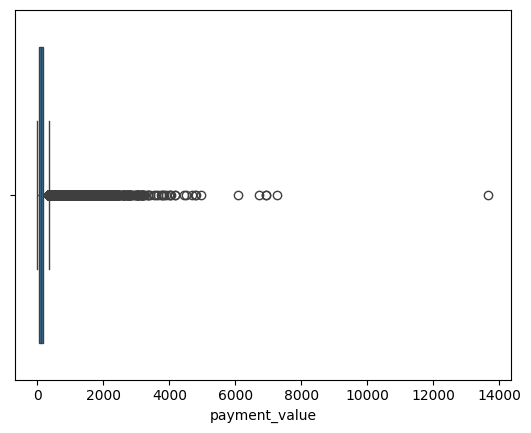

In [154]:
# Plot the boxplot of the feature payment_value
sns.boxplot(x=order_payments_df["payment_value"])

#### Assess the order_reviews table


In [155]:
# Check the summary of the dataset and its columns
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [156]:
# Check the missing value in the table order_reviews_df
order_reviews_df.isnull().sum().sort_values(ascending=False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [157]:
# Check the duplicate value in the table order_reviews_df
duplicate_value = order_reviews_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [158]:
# Check the statistics
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assess the products table


In [159]:
# Check the summary of the dataset and its columns
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Note:
The code below will return `True` if there are any decimal values in the 'product_name_lenght' column, and `False` otherwise.
Since there is no decimal values in the 'product_name_lenght' column, we can convert the data type to integer.


In [162]:
# Check the decimal values in the attribute product_name_lenght
products_df["product_name_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [163]:
# Check the decimal values in the attribute product_description_lenght
products_df["product_description_lenght"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [164]:
# Check the decimal values in the attribute product_photos_qty
products_df["product_photos_qty"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [165]:
# Check the decimal values in the attribute product_weight_g
products_df["product_weight_g"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [166]:
# Check the decimal values in the attribute product_length_cm
products_df["product_length_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [167]:
# Check the decimal values in the attribute product_height_cm
products_df["product_height_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [168]:
# Check the decimal values in the attribute product_width_cm
products_df["product_width_cm"].apply(
    lambda x: x != round(x) if pd.notnull(x) else False
).any()

False

In [ ]:
# Check the missing value in the table products_df
products_df.isnull().sum().sort_values(ascending=False)

product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_id                      0
dtype: int64

In [ ]:
# Check the duplicate value in the table products_df
duplicate_value = products_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [ ]:
# Check the statistics
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Assess the product_category table


In [ ]:
# Check the summary of the dataset and its columns
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# Check the missing value in the table product_category_name_df
product_category_name_df.isnull().sum().sort_values(ascending=False)

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
# Check the duplicate value in the table product_category_name_df
duplicate_value = product_category_name_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


In [ ]:
# Check the statistics
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Assess the sellers table


In [ ]:
# Check the summary of the dataset and its columns
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Check the missing value in the table sellers_df
sellers_df.isnull().sum().sort_values(ascending=False)

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
# Check the duplicate value in the table sellers_df
duplicate_value = sellers_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 0


#### Assess the geolocation table


In [ ]:
# Check the summary of the dataset and its columns
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# Check the missing value in the table geolocation_df
geolocation_df.isnull().sum().sort_values(ascending=False)

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
# Check the duplicate value in the table geolocation_df
duplicate_value = geolocation_df.duplicated()
print(f"Total duplicate value: {duplicate_value.sum()}")

Total duplicate value: 261831


#### Summary of Assessment


Table of Assessment Summary

| **NO** |    **TABLE NAME**     |                                                                                       **DATA TYPE**                                                                                       |                                                                                                 **MISSING VALUE**                                                                                                 |       **DUPLICATE DATA**       | **INACCURATE VALUE** |
| :----: | :-------------------: | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: | :----------------------------: | :------------------: |
|   1.   |       customers       |                                                             There is one invalid data type at column customer_zip_code_prefix                                                             |                                                                                                         -                                                                                                         |               -                |          -           |
|   2.   |        orders         |                                         There are five invalid data type starts from order_purchase_timestamp until order_estimated_delivery_date                                         |                                            There are three columns with missing values: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date                                            |               -                |          -           |
|   3.   |      order_items      |                                                                  There is one invalid data type in column order_item_id                                                                   |                                                                                                         -                                                                                                         |               -                |          -           |
|   4.   |    order_payments     |                                                                                             -                                                                                             |                                                                                                         -                                                                                                         |               -                |          -           |
|   5.   |     order_reviews     |                                                There are two invalid data type at columns review_creation_date and review_answer_timestamp                                                |                                                              There are two columns with missing values: review_comment_title review_comment_message                                                               |               -                |          -           |
|   6.   |       products        | There are seven columns needs to change, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm and product_width_cm | There are eight columns with missing values: product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm |               -                |          -           |
|   7.   | product_category_name |                                                                                             -                                                                                             |                                                                                                         -                                                                                                         |               -                |          -           |
|   8.   |        sellers        |                                                              There is one invalid data type at column seller_zip_code_prefix                                                              |                                                                                                         -                                                                                                         |               -                |          -           |
|   9.   |      geolocation      |                                                           There is one invalid data type at column geolocation_zip_code_prefix                                                            |                                                                                                         -                                                                                                         | Total duplicate values: 261831 |          -           |


### Cleaning Data


### Cleaning the customers table


#### Handling format data type


In [ ]:
# Change the customer_zip_code_prefix attribute to string
customers_df["customer_zip_code_prefix"] = customers_df[
    "customer_zip_code_prefix"
].astype(str)

# Check the data type of the customer_zip_code_prefix attribute
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### Cleaning the orders table


#### Handling format data type


Notes!

The dates will be limited to their dates (no times), so they can be grouped by how many days later they are.

I'll try to change the "order_purchase_timestamp," "order_delivered_customer_date," and "order_estimated_delivery_date" columns to DateTime format and use "ffill" to fix the numbers that are wrong in the "order_delivered_customer_date" column.

Somethings to take care of:

1. The list needs to be in the correct order.
2. The first cells will not be filled with "ffill" if they were empty cells.


In [ ]:
# Change the order_purchase_timestamp attribute to datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)

# Change the order_approved_at attribute to datetime
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])

# Change the order_delivered_carrier_date attribute to datetime
orders_df["order_delivered_carrier_date"] = pd.to_datetime(
    orders_df["order_delivered_carrier_date"]
)

# Change the order_delivered_customer_date attribute to datetime
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"]
)

# Change the order_estimated_delivery_date attribute to datetime
orders_df["order_estimated_delivery_date"] = pd.to_datetime(
    orders_df["order_estimated_delivery_date"]
)

# Check the data type of the attributes
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# Define a function to convert the data type of a column to datetime
def convert_to_datetime(dataFrame, columns):
    for column in columns:
        dataFrame[column] = pd.to_datetime(dataFrame[column], format="%Y-%m-%d").dt.date

In [ ]:
# Convert the data type of the attributes to datetime
convert_to_datetime(
    orders_df,
    [
        "order_purchase_timestamp",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ],
)
orders_df.sort_values(by=["order_purchase_timestamp"], inplace=True)

In [ ]:
# Check the data type of the attributes
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,NaT,2016-10-25


#### Handling missing value


In [ ]:
orders_df.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

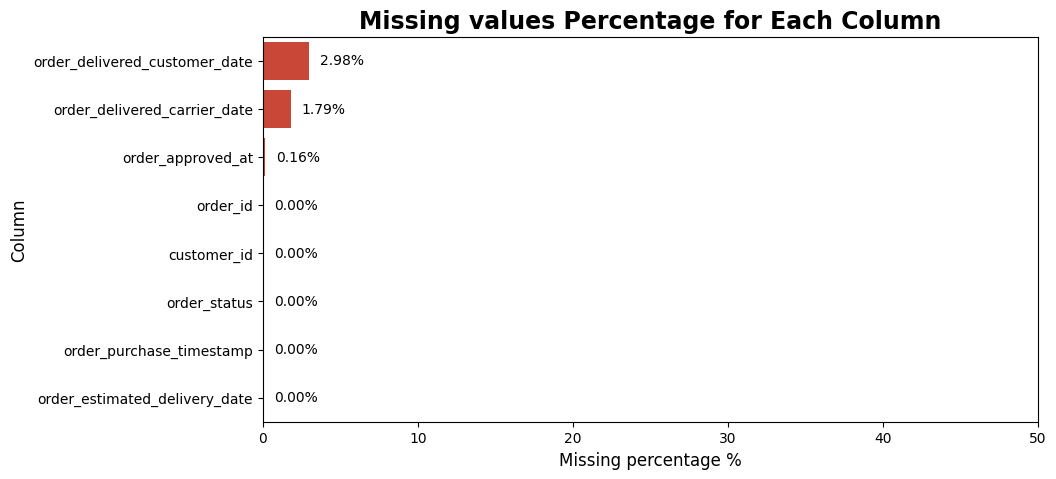

In [ ]:
# Plot the missing values
missing_percentage = pmv(orders_df)

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,shipping_duration,estimated_duration
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,55 days,19 days
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,38 days,23 days
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,11 days,51 days
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,24 days,35 days
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,36 days,53 days


In [ ]:
# First three "order_delivered_customer_date" values are empty. So, we will drop them before using ffll() method
orders_df.drop(orders_df.index[:3], inplace=True)

In [ ]:
# Check the head of the dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,NaT,2016-10-25
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25


In [ ]:
# Substitute the missing values with the previous values (forward fill):
orders_df["order_delivered_customer_date"] = orders_df[
    "order_delivered_customer_date"
].ffill()

# Check the missing values again
print("Missing values: ", orders_df["order_delivered_customer_date"].isnull().sum())

Missing values:  0


In [ ]:
# A column with ordinal order dates will also be included. This numerical format will ease further tasks.
# Adding a column with ordinal order dates
orders_df["date_ordinal"] = orders_df["order_purchase_timestamp"].apply(
    lambda date: date.toordinal()
)

Note!
These delivery time values may be useful:

- Difference between estimated delivery date and true delivery date (shipping_time_delta)
- Difference between order date and delivery date (shipping_duration)
- Difference between order date and estimated delivery date (estimated_duration)


In [ ]:
# Convert columns to date time
orders_df["order_estimated_delivery_date"] = pd.to_datetime(
    orders_df["order_estimated_delivery_date"]
)
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"]
)
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)


# Create shipping time column, which is the difference between the order estimated delivery date and the order delivered customer date
orders_df["shipping_time"] = (
    orders_df["order_estimated_delivery_date"]
    - orders_df["order_delivered_customer_date"]
)

# Create shipping duration column, which is the difference between the order delivered customer date and the order purchase timestamp
orders_df["shipping_duration"] = (
    orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
)

# Create estimated duration column, which is the difference between the order estimated delivery date and the order purchase timestamp
orders_df["estimated_duration"] = (
    orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
)

In [ ]:
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date_ordinal,shipping_time,shipping_duration,estimated_duration
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09,2016-10-04,736222,-36 days,55 days,19 days
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06 15:50:56,NaT,2016-11-09,2016-10-25,736239,-15 days,38 days,23 days
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14,2016-11-23,736240,40 days,11 days,51 days
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27,2016-11-07,736240,11 days,24 days,35 days
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08,2016-11-25,736240,17 days,36 days,53 days
62143,ae8a60e4b03c5a4ba9ca0672c164b181,e6f959bf384d1d53b6d68826699bba12,delivered,2016-10-03,2016-10-04 10:28:25,2016-10-30 14:22:04,2016-11-03,2016-12-01,736240,28 days,31 days,59 days
97979,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03,2016-11-29,736240,26 days,31 days,57 days
93285,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26,2016-10-27,736240,1 days,23 days,24 days
33504,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98d6a11d5d04d9f2a70aa6c34,delivered,2016-10-03,2016-10-04 10:28:19,2016-10-21 14:23:36,2016-11-01,2016-11-25,736240,24 days,29 days,53 days
88472,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31,2016-11-23,736240,23 days,28 days,51 days


In [ ]:
# Check if there are repeating orders
print(f"Number of unique orders: {orders_df['order_id'].nunique()}")
print(f"Number of records: {orders_df.shape[0]}")

Number of unique orders: 99438
Number of records: 99438


### Cleaning the order items table


#### Handling format data type


In [ ]:
# Change the order_item_id attribute to string
order_items_df["order_item_id"] = order_items_df["order_item_id"].astype(str)

# Check the data type of the order_item_id attribute
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  object 
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


### Cleaning the order reviews table


#### Handling format data type


In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Change the review_creation_date attribute to datetime
order_reviews_df["review_creation_date"] = pd.to_datetime(
    order_reviews_df["review_creation_date"]
)

# Change the review_answer_timestamp attribute to datetime
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(
    order_reviews_df["review_answer_timestamp"]
)

# Check the data type of the attributes
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


#### Handling missing value


In [ ]:
# Backup the dataset order_reviews_df
order_reviews_cleaned_df = order_reviews_df.copy()

In [ ]:
order_reviews_cleaned_df.isnull().sum().sort_values(ascending=False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
# Fill the missing values in review_comment_title with "No comment"
order_reviews_cleaned_df["review_comment_title"].fillna("No comment", inplace=True)

# Fill the missing values in review_comment_message with "No comment"
order_reviews_cleaned_df["review_comment_message"].fillna("No comment", inplace=True)

# Check the missing values again
print(f"Missing values: {order_reviews_cleaned_df.isnull().sum().sum()}")

Missing values: 0


In [ ]:
# Merge the dataframes order_reviews that filled the missing values with the missing values of the original dataframe
order_reviews_df = pd.merge(
    order_reviews_cleaned_df, order_reviews_df, how="left"
).copy()
order_reviews_cleaned_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No comment,No comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No comment,No comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No comment,No comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No comment,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Cleaning the products table


#### Handling the incorrect attributes name


In [ ]:
# Change the product_name_lenght attribute to product_name_length
products_df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Change the product_name_lenght attribute to product_name_length
products_df.rename(
    columns={"product_description_lenght": "product_description_length"}, inplace=True
)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Handling format data type


In [ ]:
products_df[products_df["product_category_name"].isna()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Change the datatype of the product_name_lenght

## Exploratory Data Analysis (EDA)


### Explore ...


## Visualization & Explanatory Analysis


### Question 1:


## Conclusion


### Conclusion 1
